## Preprocessing

In [1]:
import pandas as pd
import re
import spacy

import torch
from torch_geometric.data import HeteroData

import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [2]:
filename = 'data/arxiv-metadata-oai-snapshot-10000.csv'
df = pd.read_csv(filename)

In [3]:
def extract_pages(s):
    match = re.search(r"(\d+)\s*pages", s)
    if match:
        return int(match.group(1))
    else:
        return None

In [4]:
df['authors_parsed'] = df['authors_parsed'].apply(lambda x: [" ".join(i).strip() for i in eval(x)])
df['versions'] = df['versions'].apply(lambda x: eval(x)[0]["created"])
df['timestamp'] = pd.to_datetime(df['versions'], format="%a, %d %b %Y %H:%M:%S %Z")
df['timestamp'] = df['timestamp'].apply(lambda x: x.timestamp())
df["categories"] = df["categories"].apply(lambda x: x.split(" "))
df.drop(columns=["submitter", "versions", "update_date", "authors"], inplace=True)
df["pages"] = df.comments.apply(lambda x: extract_pages(str(x)))
df.head()

,id,title,comments,journal-ref,doi,report-no,categories,license,abstract,authors_parsed,timestamp,pages
0,704.0001,Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,[hep-ph],NaN,A fully differential calculation in perturba...,"[Balázs C., Berger E. L., Nadolsky P. M., Yuan...",1.175542e+09,37.0
1,704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,"[math.CO, cs.CG]",http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[Streinu Ileana, Theran Louis]",1.175308e+09,NaN
2,704.0003,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,[physics.gen-ph],NaN,The evolution of Earth-Moon system is descri...,[Pan Hongjun],1.175460e+09,23.0
3,704.0004,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,[math.CO],NaN,We show that a determinant of Stirling cycle...,[Callan David],1.175311e+09,11.0
4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,"[math.CA, math.FA]",NaN,In this paper we show how to compute the $\L...,"[Abu-Shammala Wael, Torchinsky Alberto]",1.175537e+09,NaN


In [5]:
# def tokenize_and_normalize(text):
#     nlp = spacy.load("en_core_web_sm")
#     doc = nlp(text)
#     return [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

def lemm(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

In [31]:
df_short = df[:5]

In [33]:
# create list of variables with more than one value

# tokenized_words_list = []
lemm_list = []
authors = []
categories = []
lemm_title = []

for index, row in df_short.iterrows():
    text = row['abstract']
    title = row['title']
    author = row['authors_parsed']
    category = row['categories'] 
    # tokenized_words = tokenize_and_normalize(text)
    lemm_words = lemm(text)
    lemm_title_words = lemm(title)
    # tokenized_words_list.append(tokenized_words)
    lemm_list.append(lemm_words)
    authors.append(author)
    categories.append(category)
    lemm_title.append(lemm_title_words)


# print(tokenized_words_list)
print(lemm_list)
print(authors)
print(categories)
print(lemm_title)


[['a', 'fully', 'differential', 'calculation', 'in', 'perturbative', 'quantum', 'chromodynamics', 'is', 'presented', 'for', 'the', 'production', 'of', 'massive', 'photon', 'pairs', 'at', 'hadron', 'colliders', 'all', 'next', 'to', 'leading', 'order', 'perturbative', 'contributions', 'from', 'quark', 'antiquark', 'gluon-(anti)quark', 'and', 'gluon', 'gluon', 'subprocesses', 'are', 'included', 'as', 'well', 'as', 'all', 'orders', 'resummation', 'of', 'initial', 'state', 'gluon', 'radiation', 'valid', 'at', 'next', 'to', 'next', 'to', 'leading', 'logarithmic', 'accuracy', 'the', 'region', 'of', 'phase', 'space', 'is', 'specified', 'in', 'which', 'the', 'calculation', 'is', 'most', 'reliable', 'good', 'agreement', 'is', 'demonstrated', 'with', 'data', 'from', 'the', 'fermilab', 'tevatron', 'and', 'predictions', 'are', 'made', 'for', 'more', 'detailed', 'tests', 'with', 'cdf', 'and', 'do', 'data', 'predictions', 'are', 'shown', 'for', 'distributions', 'of', 'diphoton', 'pairs', 'produced', 

In [34]:
# print(tokenized_words_list[0])

['a', 'fully', 'differential', 'calculation', 'in', 'perturbative', 'quantum', 'chromodynamics', 'is', 'presented', 'for', 'the', 'production', 'of', 'massive', 'photon', 'pairs', 'at', 'hadron', 'colliders', 'all', 'next', 'to', 'leading', 'order', 'perturbative', 'contributions', 'from', 'quark', 'antiquark', 'gluon-(anti)quark', 'and', 'gluon', 'gluon', 'subprocesses', 'are', 'included', 'as', 'well', 'as', 'all', 'orders', 'resummation', 'of', 'initial', 'state', 'gluon', 'radiation', 'valid', 'at', 'next', 'to', 'next', 'to', 'leading', 'logarithmic', 'accuracy', 'the', 'region', 'of', 'phase', 'space', 'is', 'specified', 'in', 'which', 'the', 'calculation', 'is', 'most', 'reliable', 'good', 'agreement', 'is', 'demonstrated', 'with', 'data', 'from', 'the', 'fermilab', 'tevatron', 'and', 'predictions', 'are', 'made', 'for', 'more', 'detailed', 'tests', 'with', 'cdf', 'and', 'do', 'data', 'predictions', 'are', 'shown', 'for', 'distributions', 'of', 'diphoton', 'pairs', 'produced', '

In [35]:
# create lists with every value

words = [word for sublist in lemm_list for word in sublist]

print(words)

authors_values = [author for sublist in authors for author in sublist]

categories_values = [category for sublist in categories for category in sublist]

title_values = [title for sublist in lemm_title for title in sublist]


['a', 'fully', 'differential', 'calculation', 'in', 'perturbative', 'quantum', 'chromodynamic', 'be', 'present', 'for', 'the', 'production', 'of', 'massive', 'photon', 'pair', 'at', 'hadron', 'collider', 'all', 'next', 'to', 'lead', 'order', 'perturbative', 'contribution', 'from', 'quark', 'antiquark', 'gluon-(anti)quark', 'and', 'gluon', 'gluon', 'subprocesse', 'be', 'include', 'as', 'well', 'as', 'all', 'order', 'resummation', 'of', 'initial', 'state', 'gluon', 'radiation', 'valid', 'at', 'next', 'to', 'next', 'to', 'lead', 'logarithmic', 'accuracy', 'the', 'region', 'of', 'phase', 'space', 'be', 'specify', 'in', 'which', 'the', 'calculation', 'be', 'most', 'reliable', 'good', 'agreement', 'be', 'demonstrate', 'with', 'datum', 'from', 'the', 'Fermilab', 'Tevatron', 'and', 'prediction', 'be', 'make', 'for', 'more', 'detailed', 'test', 'with', 'CDF', 'and', 'do', 'datum', 'prediction', 'be', 'show', 'for', 'distribution', 'of', 'diphoton', 'pair', 'produce', 'at', 'the', 'energy', 'of'

In [36]:
# list with all words without duplicates

words_list = []
for i in range(len(words)):
    if words[i] not in words_list:
        words_list.append(words[i])

authors_list = []
for i in range(len(authors_values)):
    if words[i] not in authors_list:
        authors_list.append(words[i])

categories_list = []
for i in range(len(categories_values)):
    if words[i] not in categories_list:
        categories_list.append(words[i])

title_words_list = []
for i in range(len(title_values)):
    if title_values[i] not in title_words_list:
        title_words_list.append(title_values[i])

In [37]:
print(words_list)
print(title_words_list)

['a', 'fully', 'differential', 'calculation', 'in', 'perturbative', 'quantum', 'chromodynamic', 'be', 'present', 'for', 'the', 'production', 'of', 'massive', 'photon', 'pair', 'at', 'hadron', 'collider', 'all', 'next', 'to', 'lead', 'order', 'contribution', 'from', 'quark', 'antiquark', 'gluon-(anti)quark', 'and', 'gluon', 'subprocesse', 'include', 'as', 'well', 'resummation', 'initial', 'state', 'radiation', 'valid', 'logarithmic', 'accuracy', 'region', 'phase', 'space', 'specify', 'which', 'most', 'reliable', 'good', 'agreement', 'demonstrate', 'with', 'datum', 'Fermilab', 'Tevatron', 'prediction', 'make', 'more', 'detailed', 'test', 'CDF', 'do', 'show', 'distribution', 'diphoton', 'produce', 'energy', 'Large', 'Hadron', 'Collider', 'LHC', 'decay', 'Higgs', 'boson', 'contrast', 'those', 'QCD', 'process', 'that', 'enhance', 'sensitivity', 'signal', 'can', 'obtain', 'judicious', 'selection', 'event', 'we', 'describe', 'new', 'algorithm', '$', 'k,\\ell)$-pebble', 'game', 'color', 'use',

In [38]:
for i in range(10):
    a = len(lemm_list[i])
    print(a)
# mit der Anzahl von Wörtern im Abstract könnte man zuordnen, welche Wörter zu welcher Arbeit gehören
# z.B. Wörter 0 bis 149 gehören zu paper1
# was machen mit gleichen Wörtern in mehreren Arbeiten

150
120
151
37
41


IndexError: list index out of range

In [ ]:
# text_list = [' '.join(words) for words in lemm_list]

# print(text_list)

# title_words_list = [' '.join(words) for words in lemm_title]

# print(title_words_list)

# brauchen wir eigentlich nicht

['a fully differential calculation in perturbative quantum chromodynamic be present for the production of massive photon pair at hadron collider all next to lead order perturbative contribution from quark antiquark gluon-(anti)quark and gluon gluon subprocesse be include as well as all order resummation of initial state gluon radiation valid at next to next to lead logarithmic accuracy the region of phase space be specify in which the calculation be most reliable good agreement be demonstrate with datum from the Fermilab Tevatron and prediction be make for more detailed test with CDF and do datum prediction be show for distribution of diphoton pair produce at the energy of the Large Hadron Collider LHC distribution of the diphoton pair from the decay of a Higgs boson be contrast with those produce from QCD process at the LHC show that enhance sensitivity to the signal can be obtain with judicious selection of event', 'we describe a new algorithm the $ k,\\ell)$-pebble game with color a

In [ ]:
# list with titles
# title_list=[]
# for i in range(len(df_short)):
#     title_list.append(df_short.title[i])
# print(title_list)

In [39]:
# create lists of attributes 

licenses_list = []
def licenses_in_list(df):
    for i in range(len(df)):
        licenses_list.append(df.license[i])
    print(licenses_list)

doi_list = []
def doi_in_list(df):
    for i in range(len(df)):
        doi_list.append(df.doi[i])
    print(doi_list)

title_list = []
def titles_in_list(df):
    for i in range(len(df)):
        title_list.append(df.title[i])
    print(title_list)

comment_list = []
def comments_in_list(df):
    for i in range(len(df)):
        comment_list.append(df.comments[i])
    print(comment_list)


# author_list = []
# def authors_in_list(df):
#     for i in range(len(df)):
#         author_list.append(df.authors_parsed[i])
#     print(author_list)


# categories_list = []
# def categories_in_list(df):
#     for i in range(len(df)):
#         categories_list.append(df['categories'][i])
#     print(categories_list)


journal_list = []
def journals_in_list(df):
    for i in range(len(df)):
        journal_list.append(df['journal-ref'][i])
    print(journal_list)

words_in_title_list = []
def words_in_title(df):
    for i in range(len(df)):
        words_in_title_list.append(df.title[i].split())
    print(words_in_title_list)

In [40]:
licenses_in_list(df_short)
doi_in_list(df_short)
titles_in_list(df_short)
comments_in_list(df_short)
# authors_in_list(df_short)
# categories_in_list(df_short)
journals_in_list(df_short)

[nan, 'http://arxiv.org/licenses/nonexclusive-distrib/1.0/', nan, nan, nan]
['10.1103/PhysRevD.76.013009', nan, nan, nan, nan]
['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Sparsity-certifying Graph Decompositions', 'The evolution of the Earth-Moon system based on the dark matter field\r\n  fluid model', 'A determinant of Stirling cycle numbers counts unlabeled acyclic\r\n  single-source automata', 'From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_{\\alpha}$']
['37 pages, 15 figures; published version', 'To appear in Graphs and Combinatorics', '23 pages, 3 figures', '11 pages', nan]
['Phys.Rev.D76:013009,2007', nan, nan, nan, 'Illinois J. Math. 52 (2008) no.2, 681-689']


In [41]:
data = HeteroData()
data['paper'].num_nodes = len(df_short)
data['paper'].license = licenses_list
data['paper'].doi = doi_list
data['paper'].title = title_list
data['paper'].comment = comment_list

data['author'].num_nodes = len(authors_list)
data['author'].name = authors_list

data['category'].num_nodes = len(categories_list)
data['category'].name = categories_list

data['journal'].num_nodes = len(df_short)
data['journal'].name = journal_list

data['word'].num_nodes = len(words_list)
data['word'].name = words_list

data

HeteroData(
  paper={
    num_nodes=5,
    license=[5],
    doi=[5],
    title=[5],
    comment=[5],
  },
  author={
    num_nodes=10,
    name=[10],
  },
  category={
    num_nodes=7,
    name=[7],
  },
  journal={
    num_nodes=5,
    name=[5],
  },
  word={
    num_nodes=251,
    name=[251],
  }
)

In [42]:
edge_index_list_written_by = []
list_of_authors = []
list_of_titles = []

# Iteriere durch die Zeilen des DataFrames
for i in range(len(df_short)):
    # Holen der ID des Papers aus der aktuellen Zeile
    paper_title = df_short['title'][i]
    
    # Holen der Autoreninformationen aus der aktuellen Zeile
    authors_parsed = df_short['authors_parsed'][i]
    
    for j in authors_parsed:
        list_of_authors.append(j)
        list_of_titles.append(paper_title)

edge_index_list_written_by.append(list_of_titles)
edge_index_list_written_by.append(list_of_authors)


# Konvertiere die Liste in ein torch.Tensor-Objekt
# edge_index_tensor = torch.tensor(edge_index_list, dtype=torch.long).t()

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'written_by', 'author'].edge_index = edge_index_list_written_by




In [43]:
edge_index_list_has_category = []
list_of_paper_cat = []
list_of_categories = []

# Iteriere durch die Zeilen des DataFrames
for i in range(len(df_short)):
    # Holen der ID des Papers aus der aktuellen Zeile
    paper_title = df_short['title'][i]
    
    # Holen der Kategorieninformationen aus der aktuellen Zeile
    categories = df_short['categories'][i]
    
    # Hier gehe ich davon aus, dass die Kategorien als Liste vorliegen
    for category in categories:
        list_of_categories.append(category)
        list_of_paper_cat.append(paper_title)

edge_index_list_has_category.append(list_of_paper_cat)
edge_index_list_has_category.append(list_of_categories)

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'has_category', 'category'].edge_index = edge_index_list_has_category


In [44]:
edge_index_list_in_journal = []
list_of_paper_journal = []
list_of_journals = []

# Iteriere durch die Zeilen des DataFrames
for i in range(len(df_short)):
    # Holen der ID des Papers aus der aktuellen Zeile
    paper_title = df_short['title'][i]
    
    # Holen des Journalnamens aus der aktuellen Zeile
    journal = df_short['journal-ref'][i]
    
    # Überprüfe, ob der Journal-Eintrag NaN ist
    if pd.notna(journal):
        list_of_journals.append(journal)
        list_of_paper_journal.append(paper_title)

# Füge nur gültige Einträge hinzu
edge_index_list_in_journal.append(list_of_paper_journal)
edge_index_list_in_journal.append(list_of_journals)

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'in_journal', 'journal-ref'].edge_index = edge_index_list_in_journal


In [45]:
edge_index_list_has_word = []
list_of_paper_word = []
list_of_words = []

# Iteriere durch die Zeilen des DataFrames
for i in range(len(df_short)):
    # Holen der ID des Papers aus der aktuellen Zeile
    paper_title = df_short['title'][i]
    
    # Holen der Wortinformationen aus der aktuellen Zeile
    words = lemm_list[i]
    
    # Hier gehe ich davon aus, dass die Wörter als Liste vorliegen
    for word in words:
        list_of_words.append(word)
        list_of_paper_word.append(paper_title)

edge_index_list_has_word.append(list_of_paper_word)
edge_index_list_has_word.append(list_of_words)

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'has_word', 'word'].edge_index = edge_index_list_has_word


In [46]:
edge_index_list_has_titleword = []
list_of_paper_titleword = []
list_of_titlewords = []

# Iteriere durch die Zeilen des DataFrames
for i in range(len(df_short)):
    # Holen der ID des Papers aus der aktuellen Zeile
    paper_title = df_short['title'][i]
    
    # Holen der Wortinformationen aus der aktuellen Zeile (hier nehmen wir die Titelwörter)
    title_words = lemm_title[i]
    
    # Hier gehe ich davon aus, dass die Titelwörter als Liste vorliegen
    for title_word in title_words:
        list_of_titlewords.append(title_word)
        list_of_paper_titleword.append(paper_title)

edge_index_list_has_titleword.append(list_of_paper_titleword)
edge_index_list_has_titleword.append(list_of_titlewords)

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'has_titleword', 'word'].edge_index = edge_index_list_has_titleword


In [47]:
a = data['paper', 'in_journal', 'journal-ref'].edge_index
a

[['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_{\\alpha}$'],
 ['Phys.Rev.D76:013009,2007', 'Illinois J. Math. 52 (2008) no.2, 681-689']]

In [48]:
data.edge_attrs

<bound method BaseData.edge_attrs of HeteroData(
  paper={
    num_nodes=5,
    license=[5],
    doi=[5],
    title=[5],
    comment=[5],
  },
  author={
    num_nodes=10,
    name=[10],
  },
  category={
    num_nodes=7,
    name=[7],
  },
  journal={
    num_nodes=5,
    name=[5],
  },
  word={
    num_nodes=251,
    name=[251],
  },
  (paper, written_by, author)={ edge_index=[2] },
  (paper, has_category, category)={ edge_index=[2] },
  (paper, in_journal, journal-ref)={ edge_index=[2] },
  (paper, has_word, word)={ edge_index=[2] },
  (paper, has_titleword, word)={ edge_index=[2] }
)>

In [49]:
edge_index_data = data['paper', 'written_by', 'author'].edge_index
edge_index_data


[['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Sparsity-certifying Graph Decompositions',
  'Sparsity-certifying Graph Decompositions',
  'The evolution of the Earth-Moon system based on the dark matter field\r\n  fluid model',
  'A determinant of Stirling cycle numbers counts unlabeled acyclic\r\n  single-source automata',
  'From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_{\\alpha}$',
  'From dyadic $\\Lambda_{\\alpha}$ to $\\Lambda_{\\alpha}$'],
 ['Balázs C.',
  'Berger E. L.',
  'Nadolsky P. M.',
  'Yuan C. -P.',
  'Streinu Ileana',
  'Theran Louis',
  'Pan Hongjun',
  'Callan David',
  'Abu-Shammala Wael',
  'Torchinsky Alberto']]

In [50]:
a= data['paper', 'has_word', 'word'].edge_index
a

[['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton produc

In [51]:
b = data['paper', 'has_titleword', 'word'].edge_index
b

[['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies',
  'Calculation of prompt diphoton produc

In [52]:
for sublist in b:
    print(sublist)

['Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections at Tevatron and\r\n  LHC energies', 'Calculation of prompt diphoton production cross sections a

In [53]:
# word in number
word_to_index = {word: idx for idx, word in enumerate(set(word for sublist in edge_index_list_has_titleword for word in sublist))}


# Erstelle die Edge-Index-Listen mit den gemappten Zahlen
edge_index_list_has_titleword = [
    [word_to_index[word] for word in sublist] for sublist in edge_index_list_has_titleword
]

# Konvertiere die Listen in torch.Tensor-Objekte
edge_index_tensor_has_titleword = torch.tensor(edge_index_list_has_titleword, dtype=torch.long)

# Weise die Edge-Indizes dem HeteroData-Objekt zu
data['paper', 'has_titleword', 'word'].edge_index = edge_index_tensor_has_titleword

In [54]:
data['paper', 'has_titleword', 'word'].edge_index

tensor([[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 19, 19, 19, 19, 23, 23,
         23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 21, 21, 21, 21, 21,
         21, 21, 21, 21, 21, 21, 21, 10, 10, 10, 10, 10, 10, 10],
        [30, 28, 45, 36,  1,  6, 11, 43, 46, 24, 27, 47, 38, 18, 39, 31, 22,  0,
         28, 22, 25, 29,  5, 13, 32, 22, 37, 12, 14, 44, 34,  7, 35, 28,  2, 15,
         40, 16,  3, 42, 17, 20,  9, 33, 26,  4,  8, 41,  4,  8]])

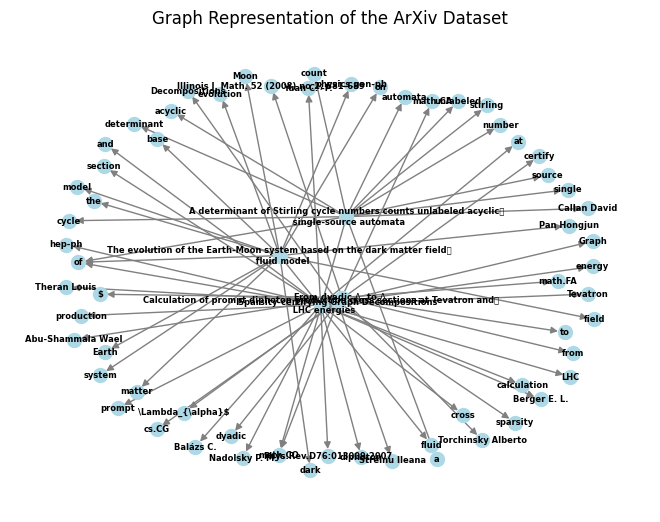

In [55]:
edge_index_data = data['paper', 'written_by', 'author'].edge_index


# # Entferne alle nicht-alphanumerischen Zeichen aus Titeln und Autorennamen
# cleaned_titles = [re.sub(r'\W+', '', title) for title in list_of_titles]
# cleaned_authors = [re.sub(r'\W+', '', author) for author in list_of_authors]

# Erstelle einen leeren gerichteten Graphen
G = nx.DiGraph()

# Füge Knoten (Autoren) und Kanten (Verbindungen) zum Graphen hinzu
for paper_id, author_id in zip(list_of_titles, list_of_authors):
    G.add_node(author_id)
    G.add_edge(paper_id, author_id)

for paper_id, category in zip(list_of_paper_cat, list_of_categories):
    G.add_node(category)
    G.add_edge(paper_id, category)

for paper_id, journal in zip(list_of_paper_journal, list_of_journals):
    G.add_node(journal)
    G.add_edge(paper_id, journal)

# for paper_id, word in zip(list_of_paper_word, list_of_words):
#     G.add_node(word)
#     G.add_edge(paper_id, word)

for paper_id, word_in_title in zip(list_of_paper_titleword, list_of_titlewords):
    G.add_node(word_in_title)
    G.add_edge(paper_id, word_in_title)

# Zeige den Graphen an, deaktiviere die Verarbeitung von LaTeX-Symbolen
plt.rcParams['text.usetex'] = False

pos = nx.spring_layout(G)  # Layout des Graphen
nx.draw(G, pos, with_labels=True, font_size=6, node_size=100, node_color='lightblue', font_color='black', font_weight='bold', edge_color='gray')
plt.title("Graph Representation of the ArXiv Dataset")
plt.show()
